This is the code for the Example 19. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_1, X_3, X_4, X_5, X_7, X_8$
- Cause node: $X_9$
- Outcome node: $X_{11}$
- Node that satisfies the backdoor criterion for a pair $(X_9, X_{11})$: $X_2, X_6, X_{10}$

<div>
<img src="../SCM_fig/SCM5.png" width="600"/>
</div>

- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = -X_1 + U_2$
  - $X_3 = X_2 + 0.1 + U_3$
  - $X_4 = -X_2 + 0.1 + U_4$
  - $X_5 = 1.3 X_1 + U_5 * X_1 + U_5$
  - $X_6 = -1.2 (X_5 + 0.1) + X_5 + U_6$
  - $X_7 = -X_6^2 - X_6 + U_7$
  - $X_8 = 3 X_6 + 0.1 + U_8$
  - $X_9 = X_1 X_5 + X_1 + 0.1 - X_5^2 + U_8$
  - $X_{10} = X_9^2+ U_{10}$
  - $X_{11} = X_3 X_4 + X_7 X_8 - 0.1 + X_9 X_{10} + X_3 X_9 - X_7 X_{10} + X_8$

In [2]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM5 import SCM5

  0%|          | 0/5 [00:00<?, ?it/s]

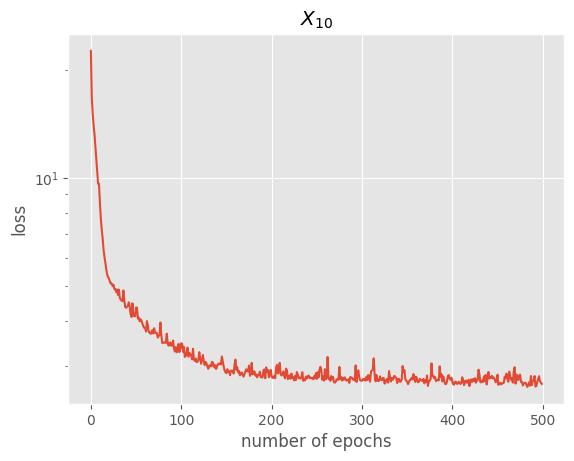

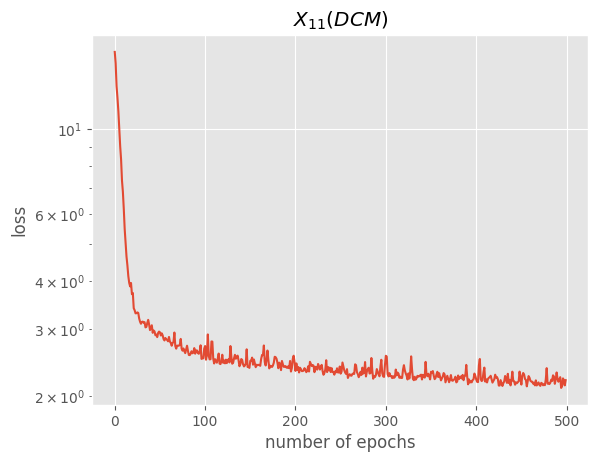

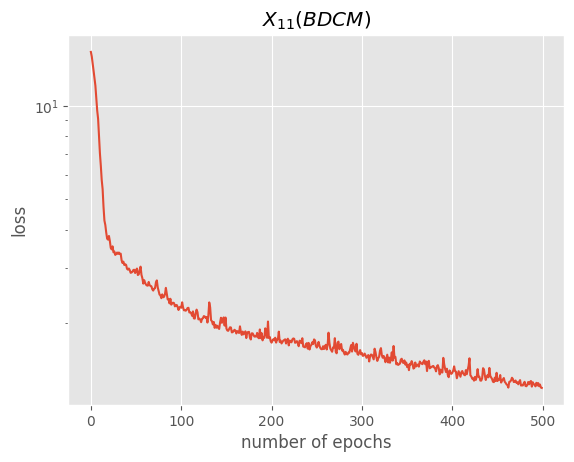

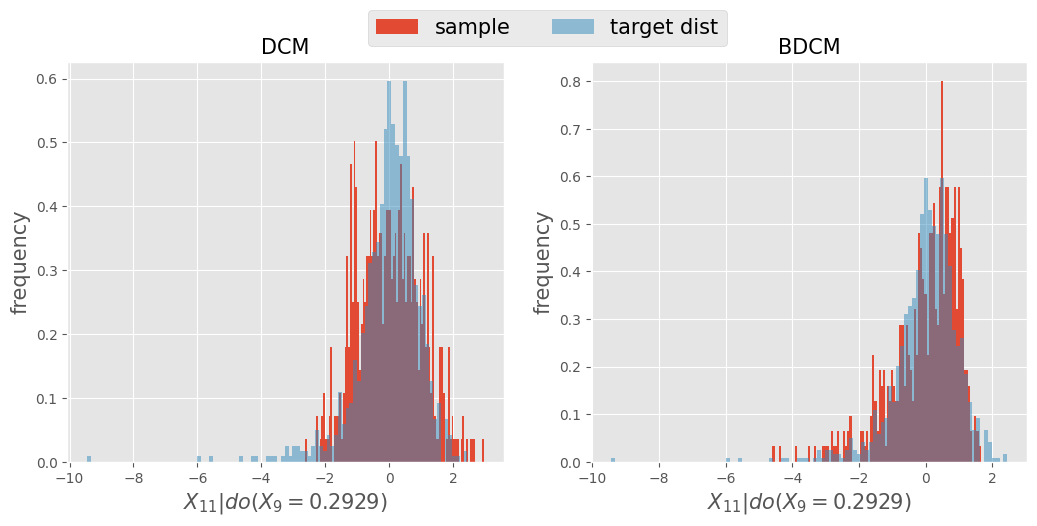

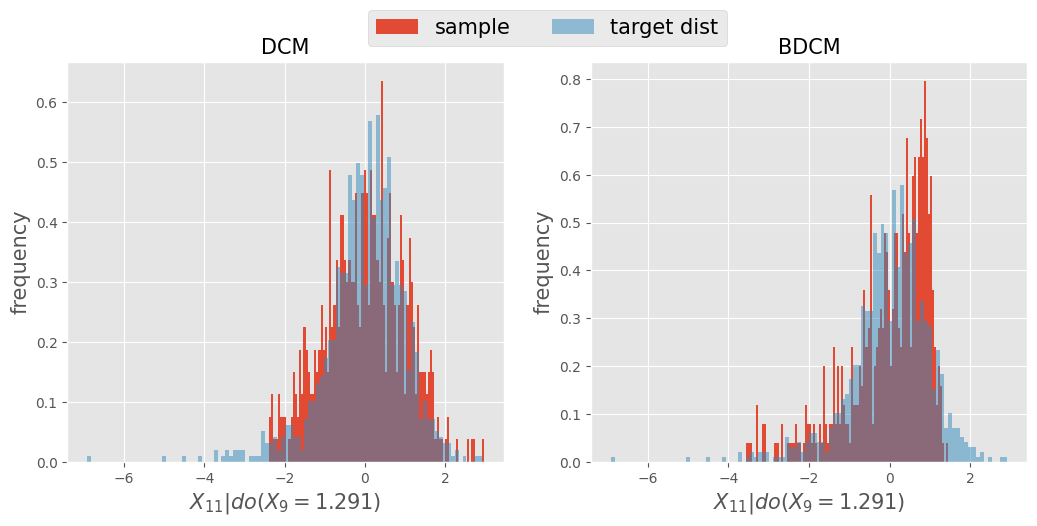

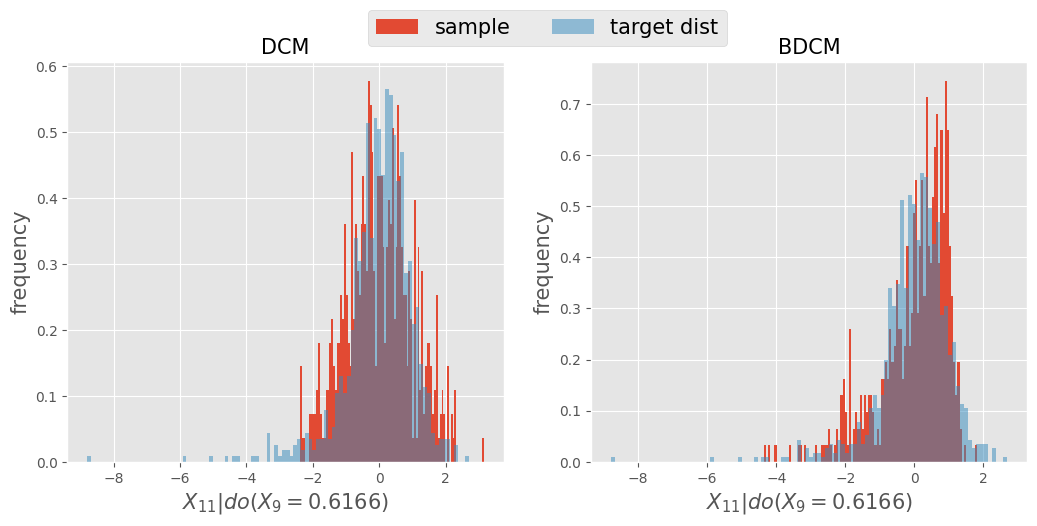

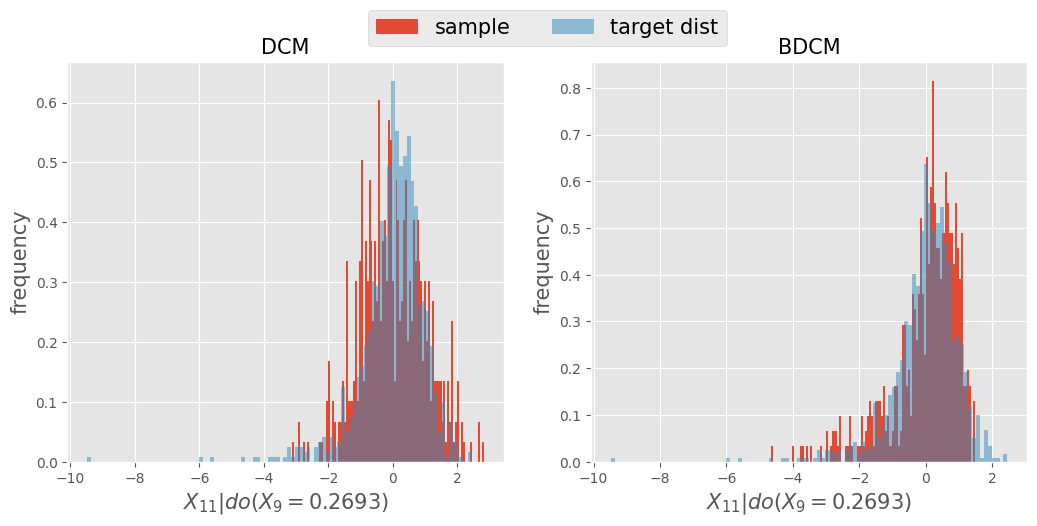

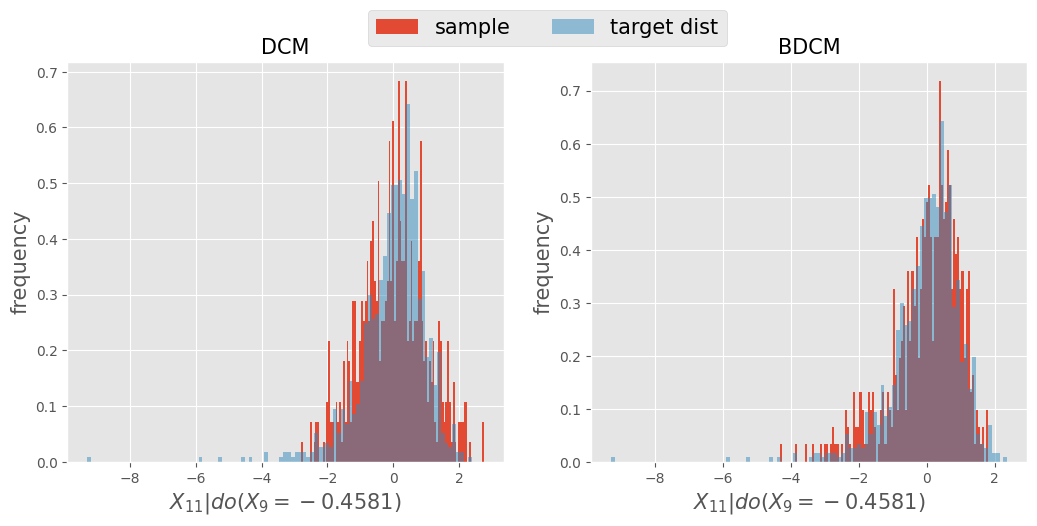

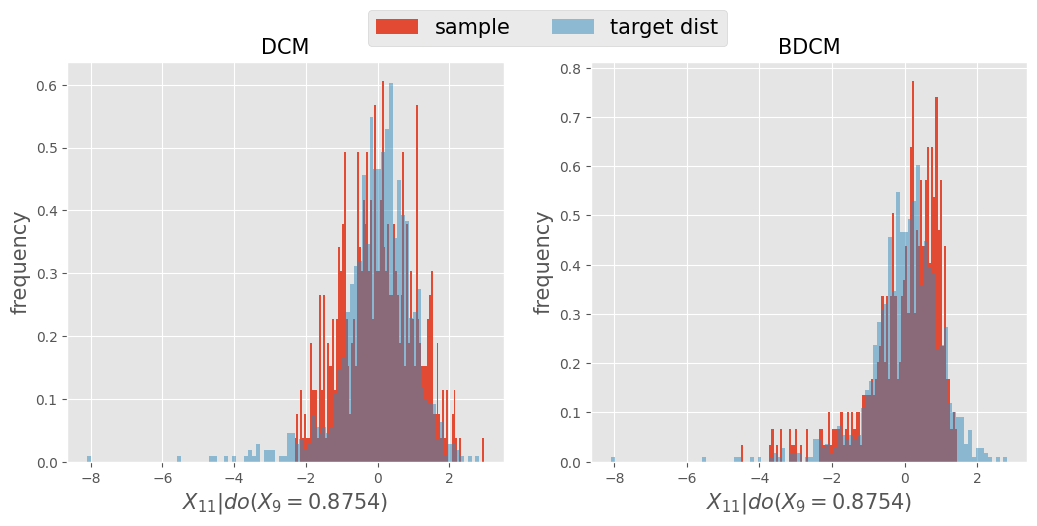

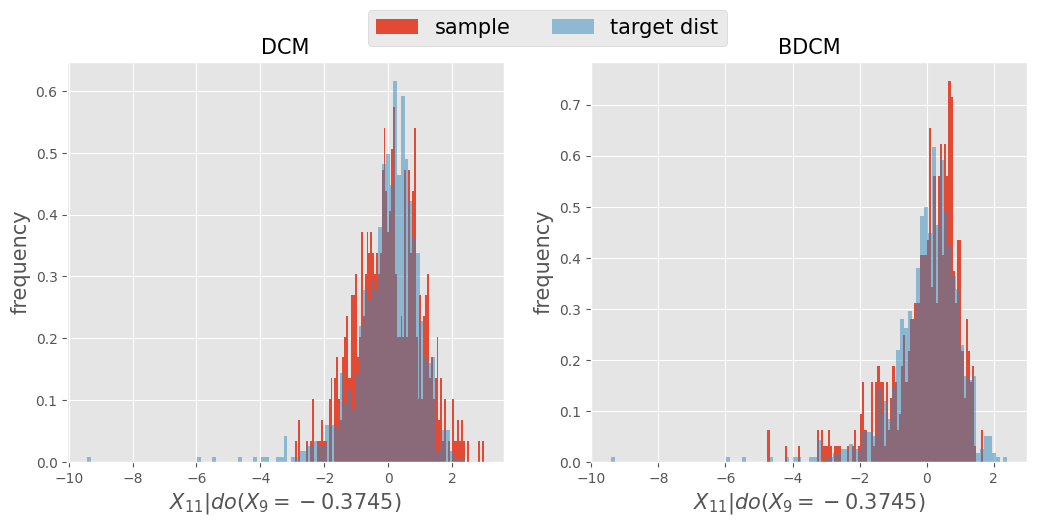

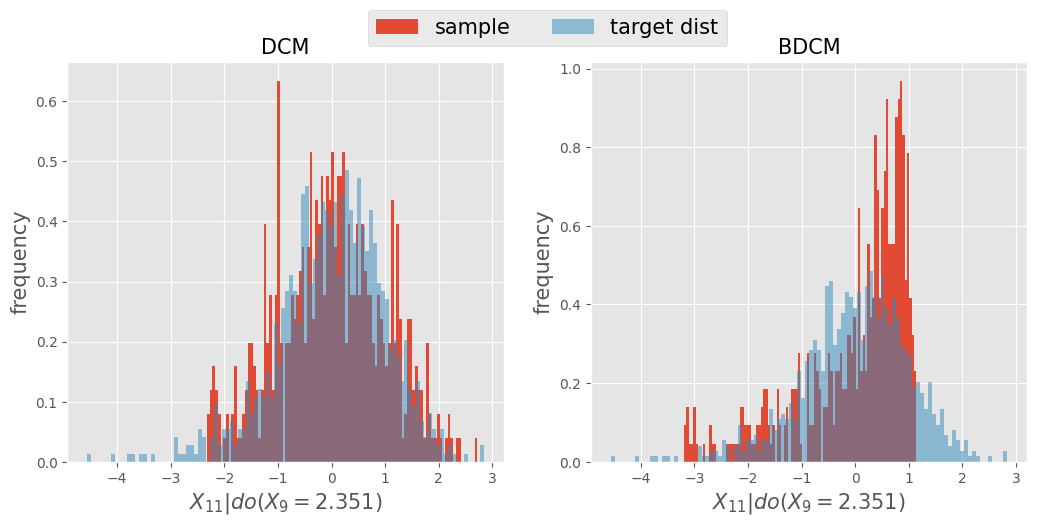

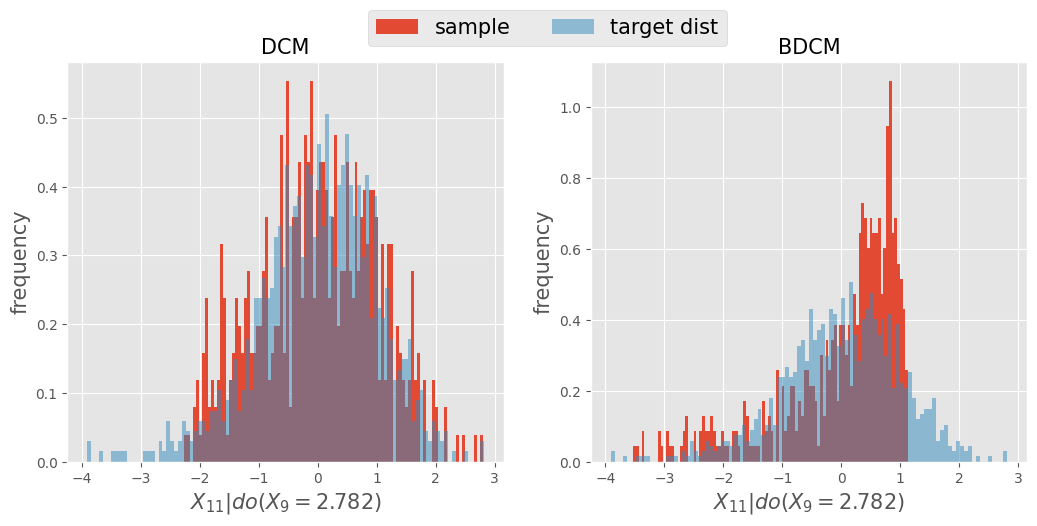

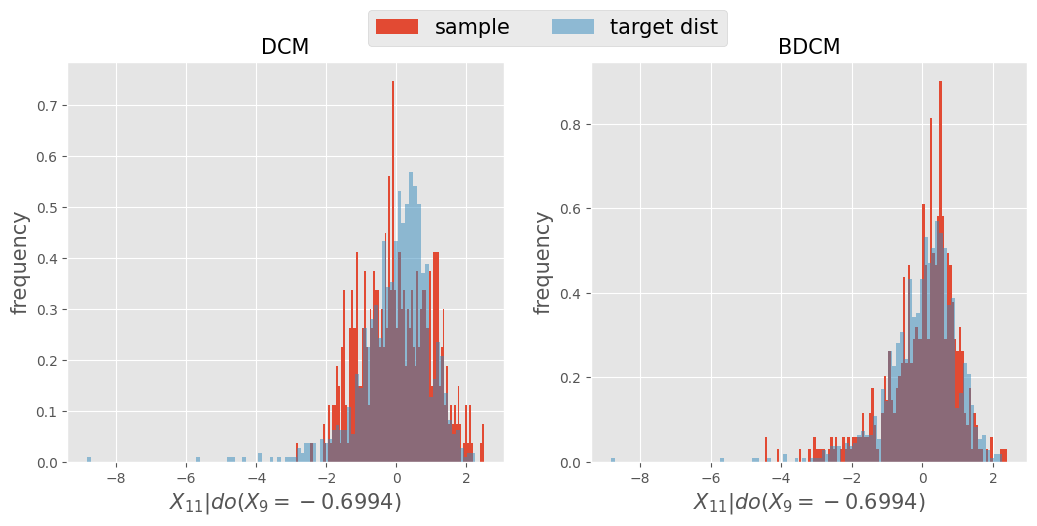

 20%|██        | 1/5 [08:19<33:16, 499.02s/it]

mean of MMD for DCM: 0.000969
standard deviation of MMD for DCM: 0.00051
mean of MMD for BDCM: 0.000302
standard deviation of MMD for BDCM: 9.01e-05


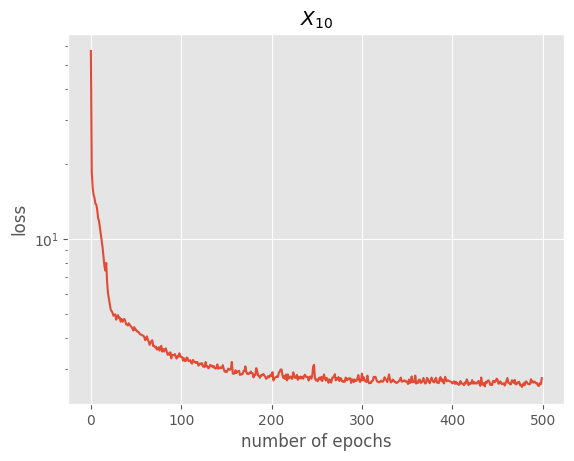

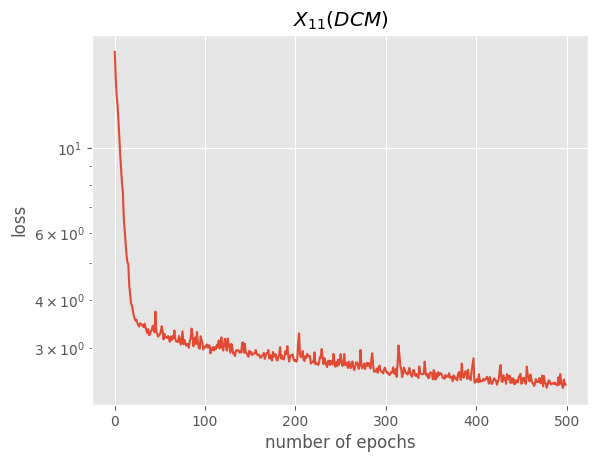

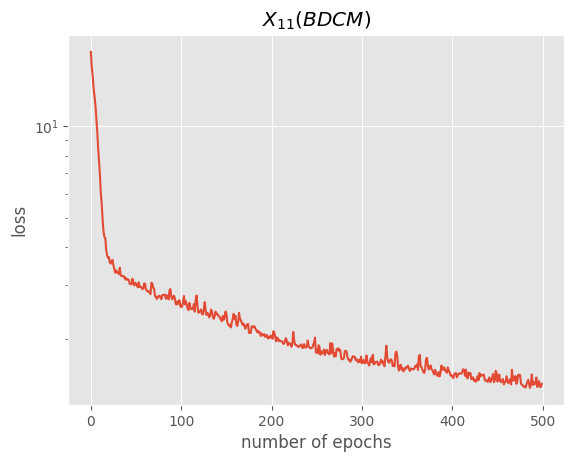

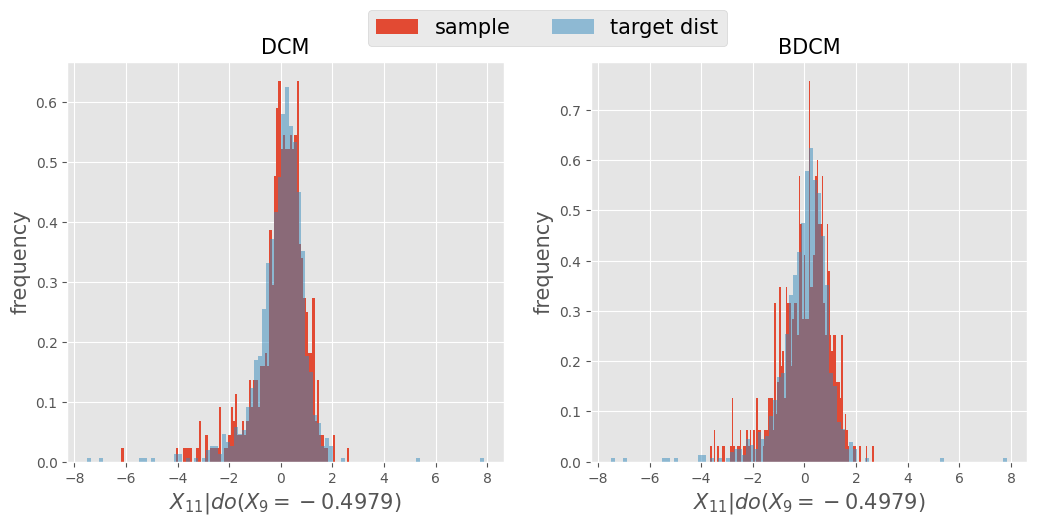

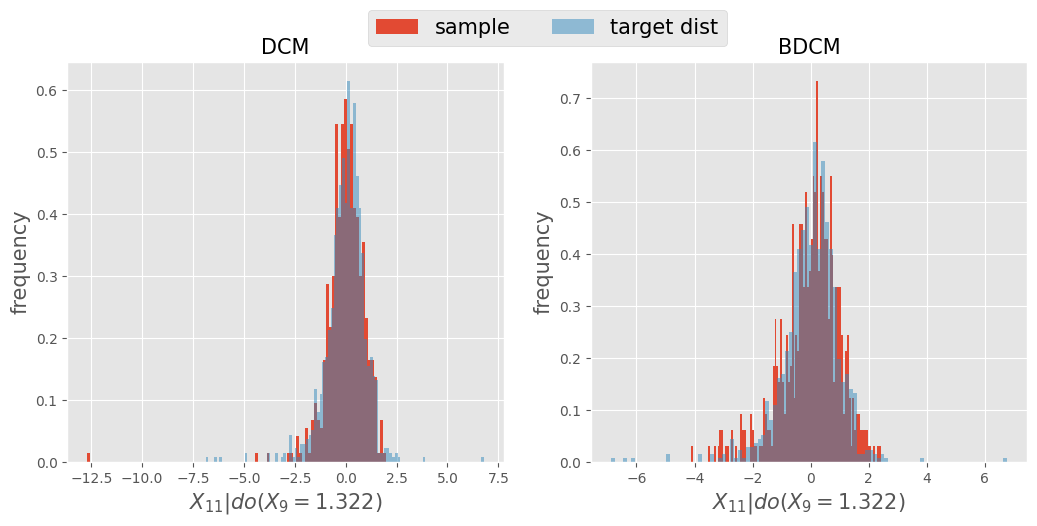

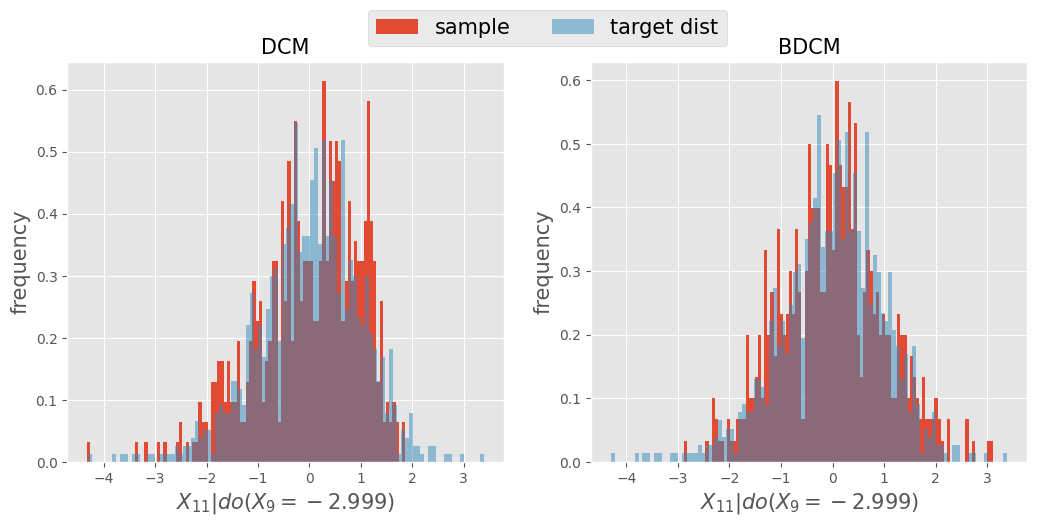

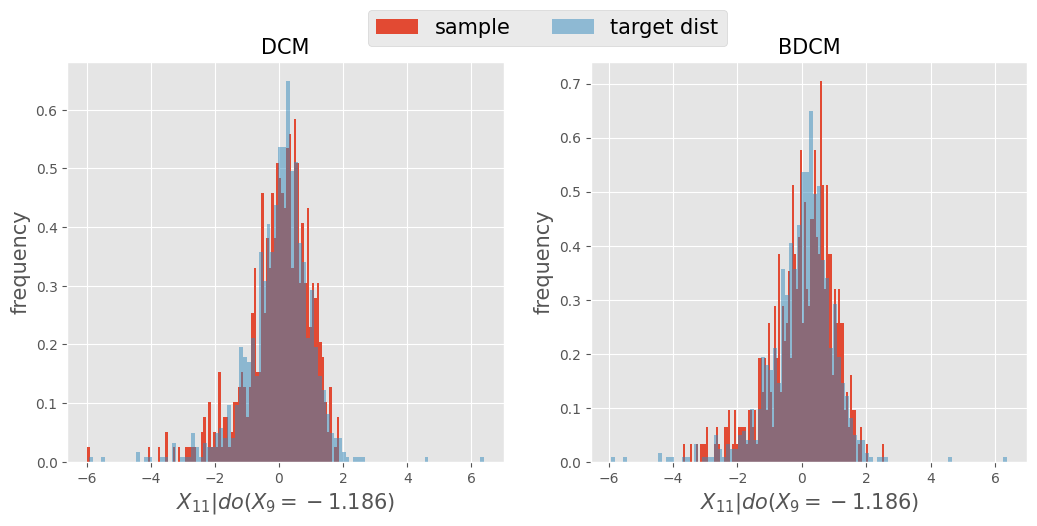

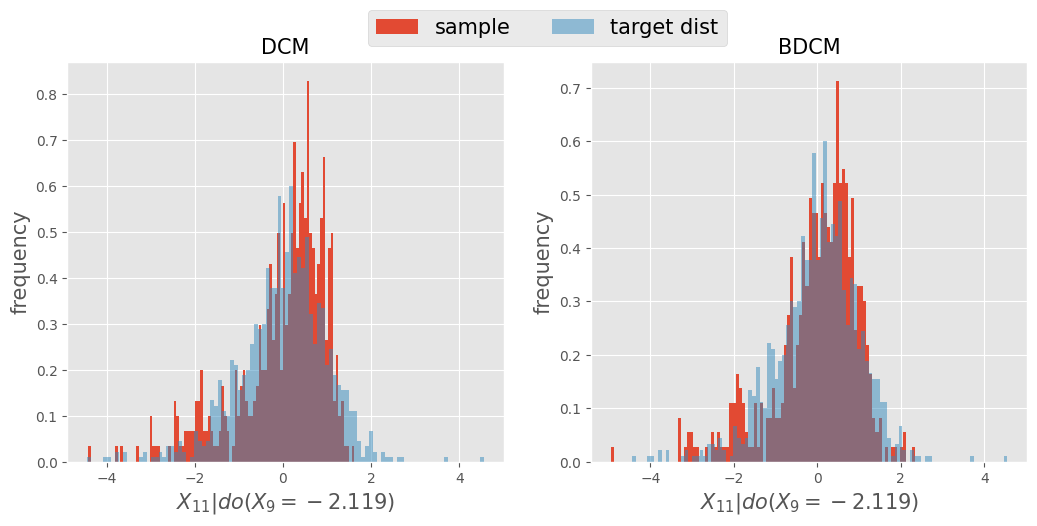

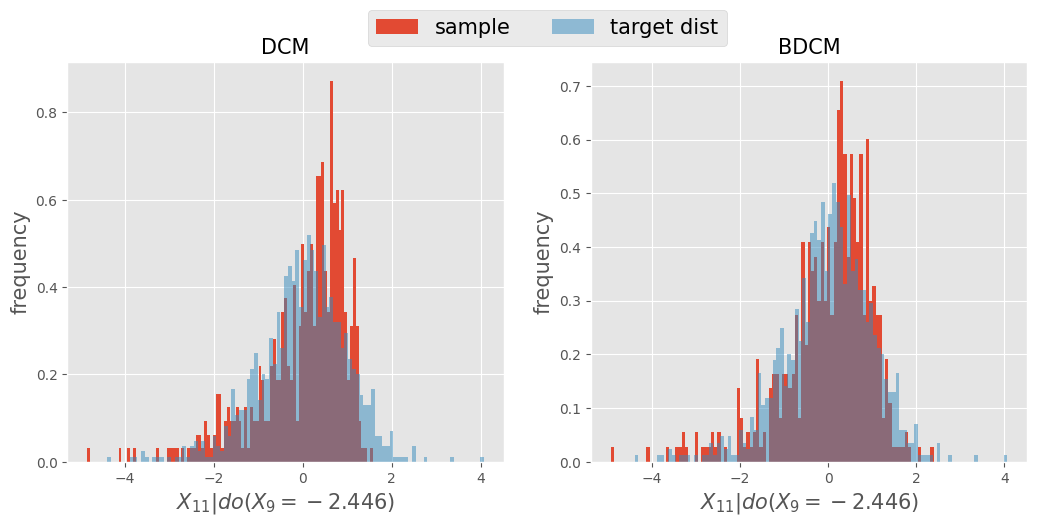

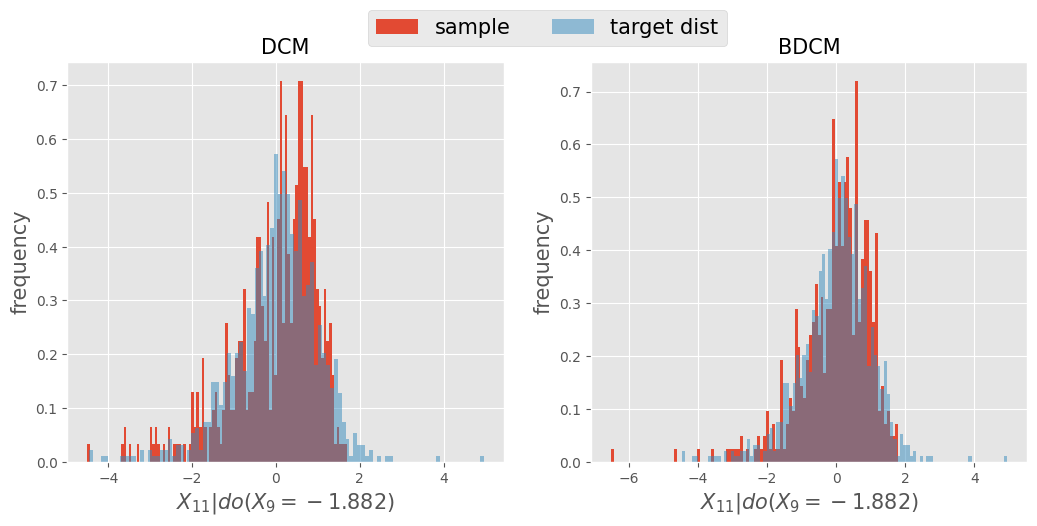

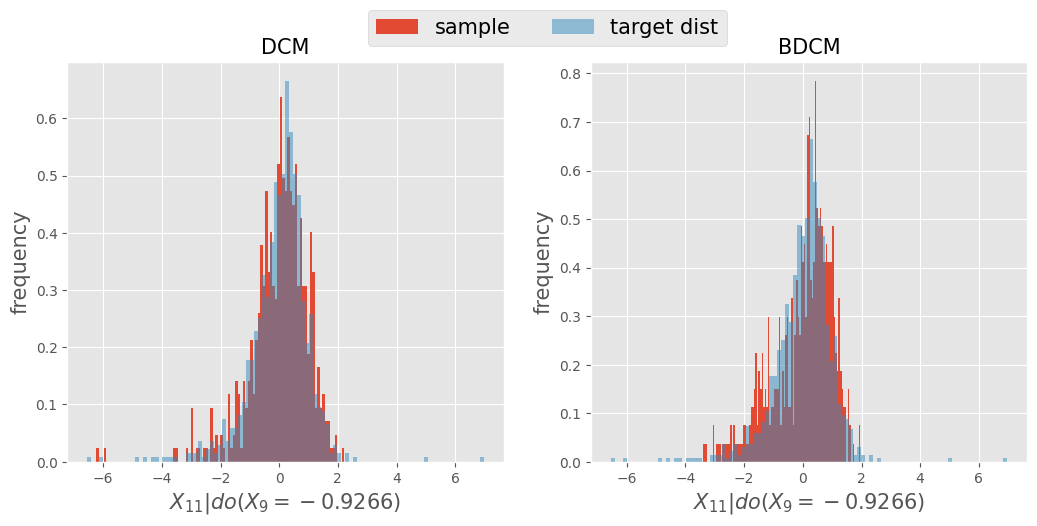

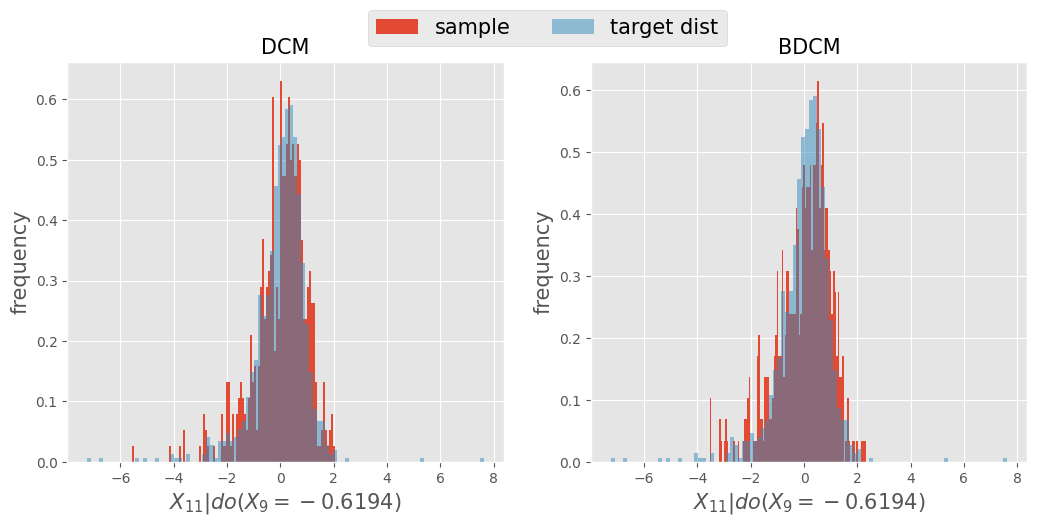

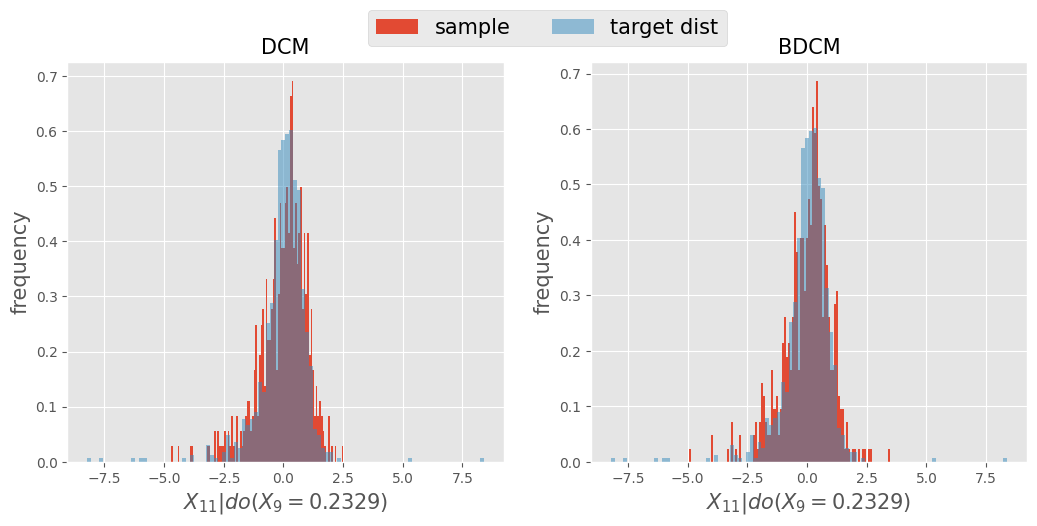

 40%|████      | 2/5 [16:26<24:36, 492.08s/it]

mean of MMD for DCM: 0.00115
standard deviation of MMD for DCM: 0.000539
mean of MMD for BDCM: 0.000947
standard deviation of MMD for BDCM: 0.00058


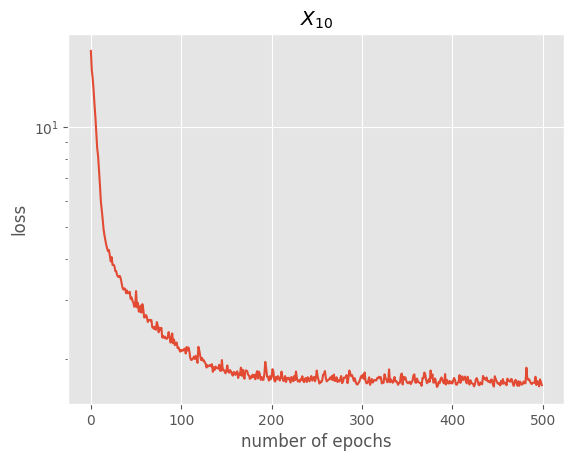

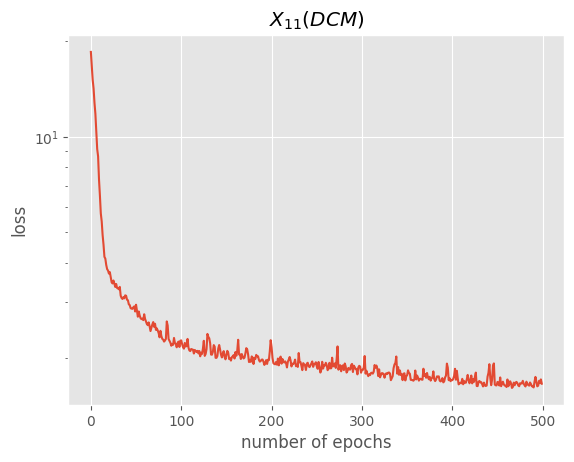

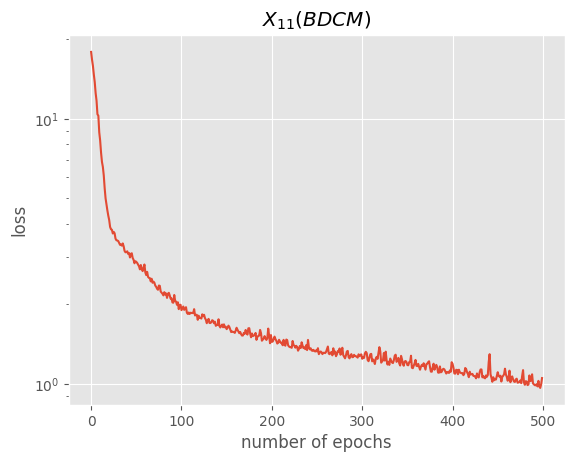

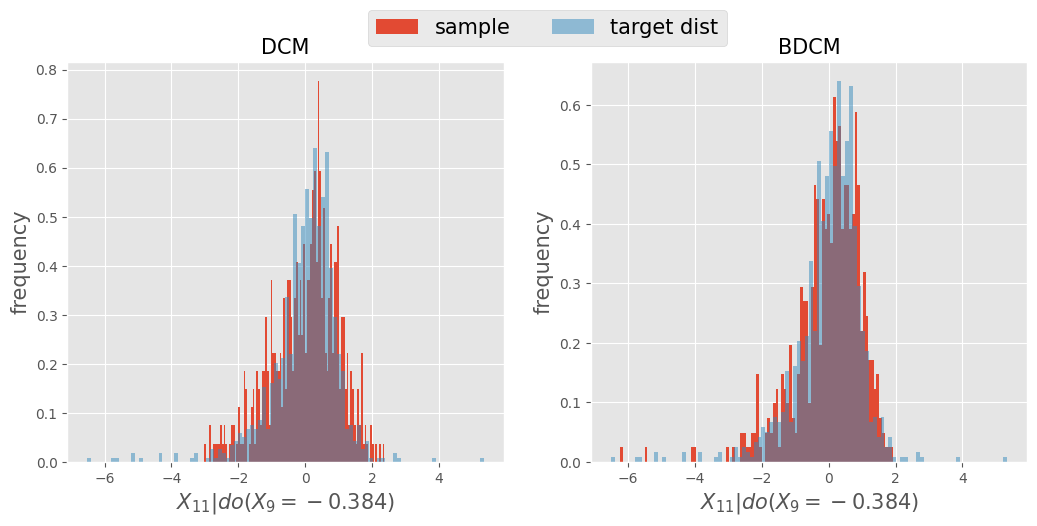

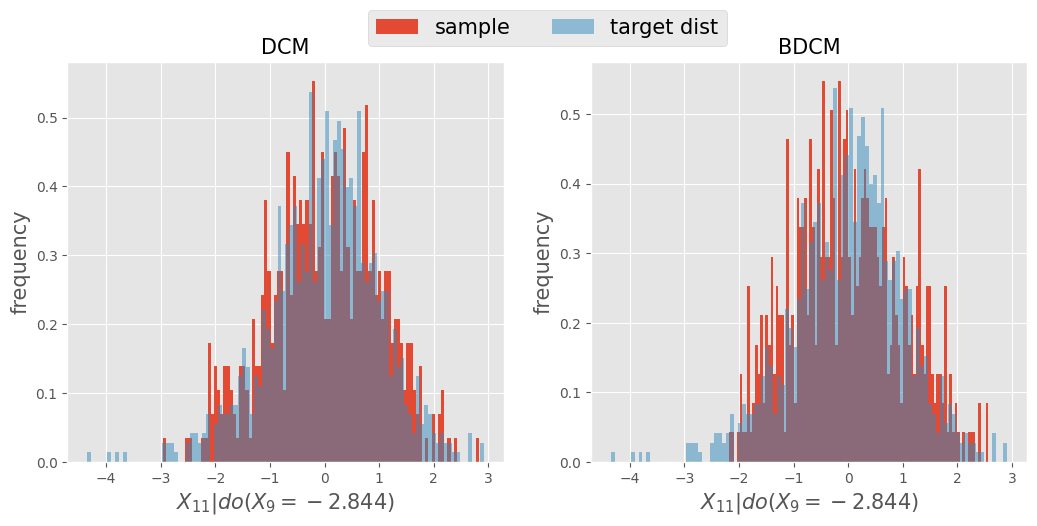

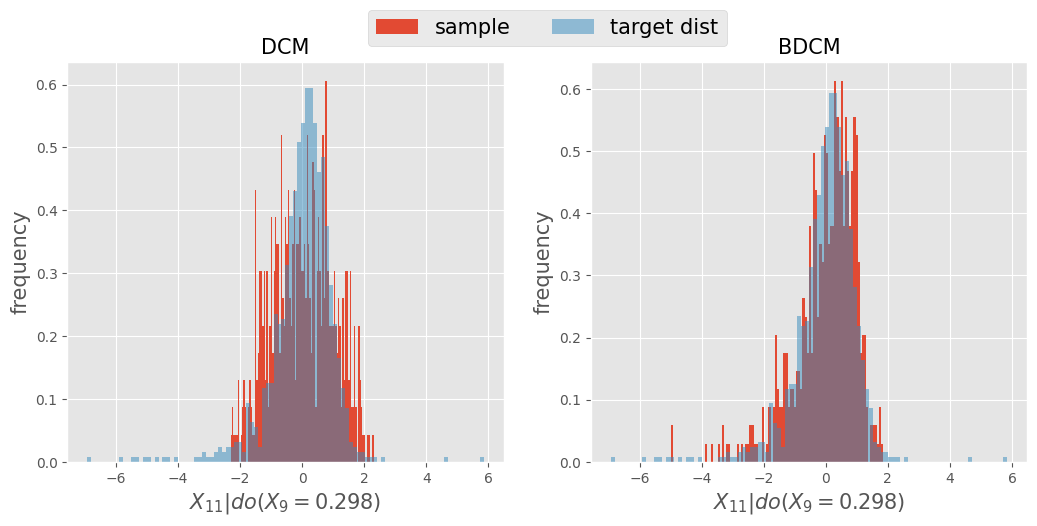

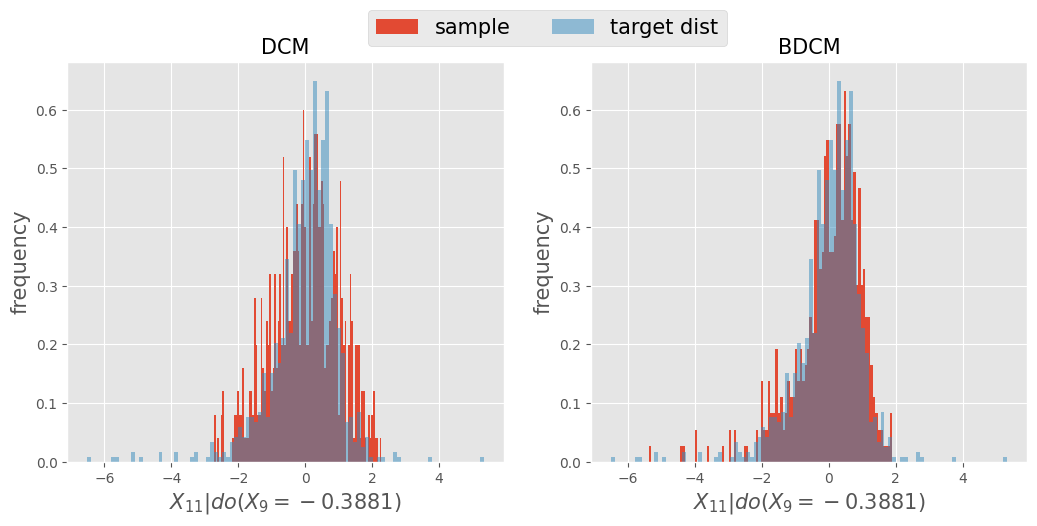

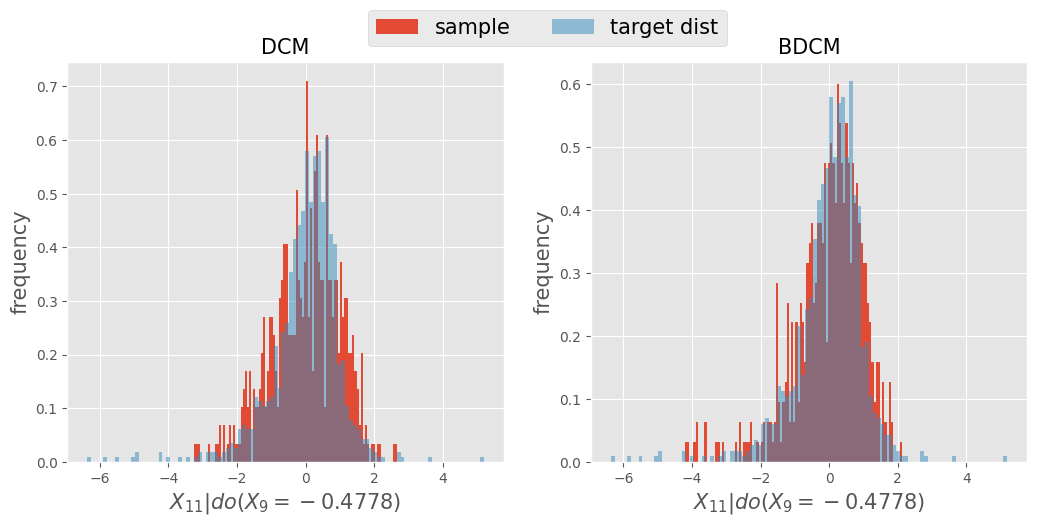

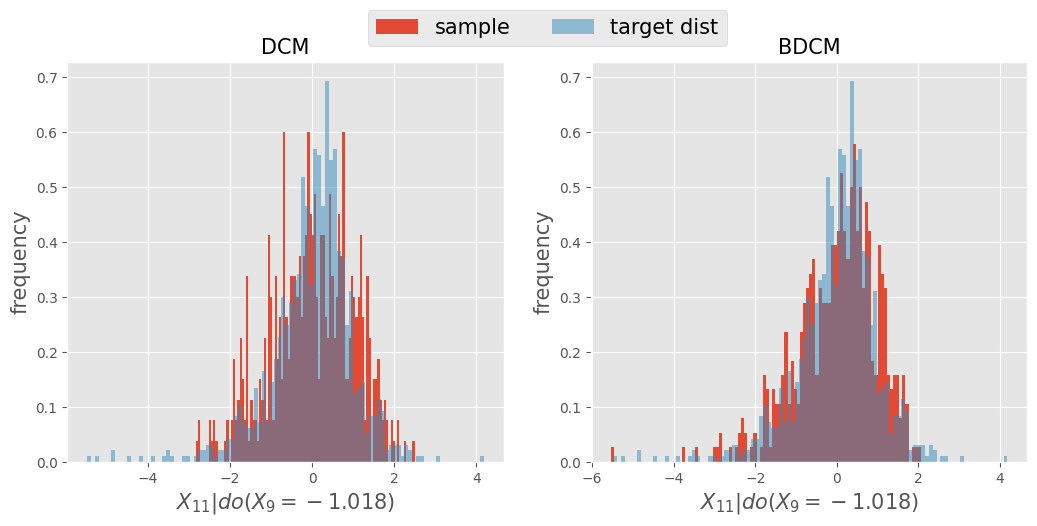

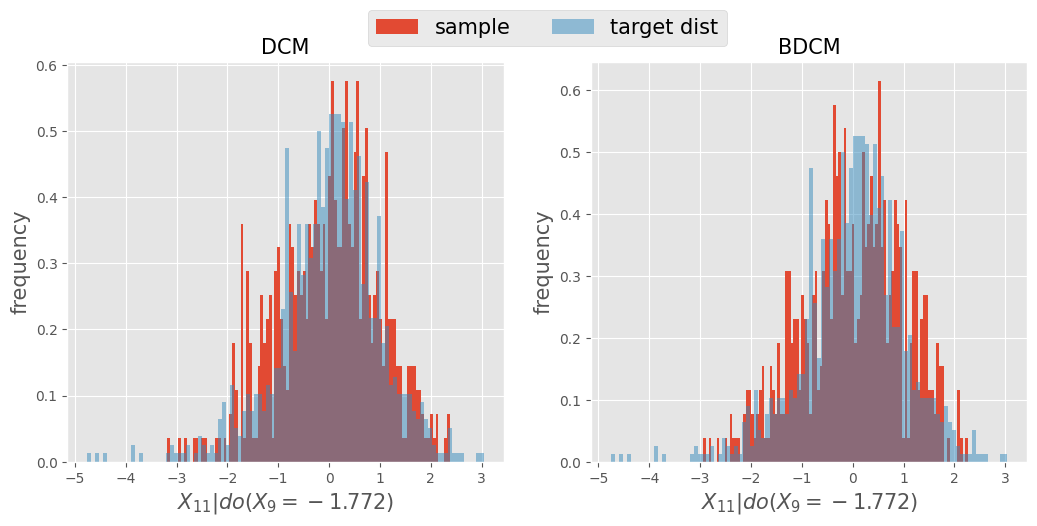

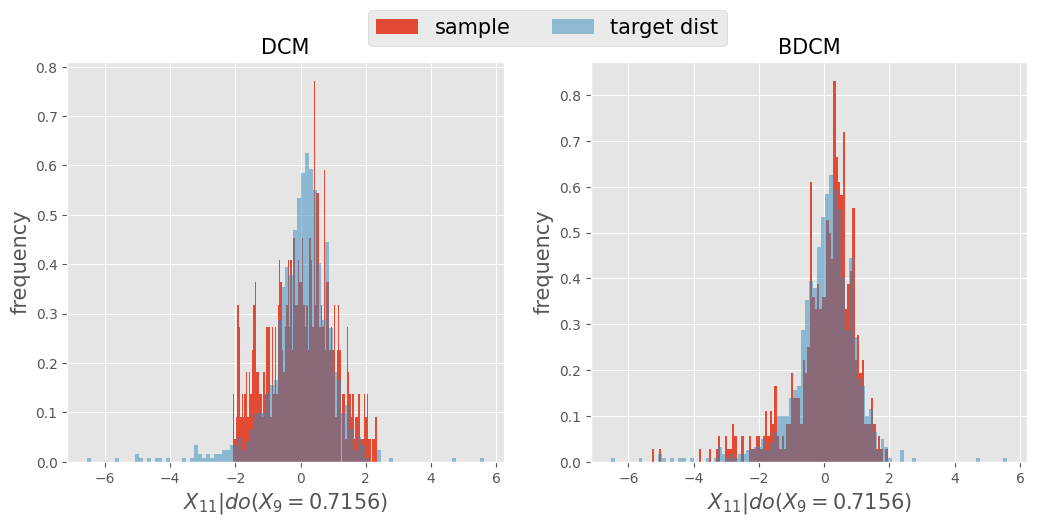

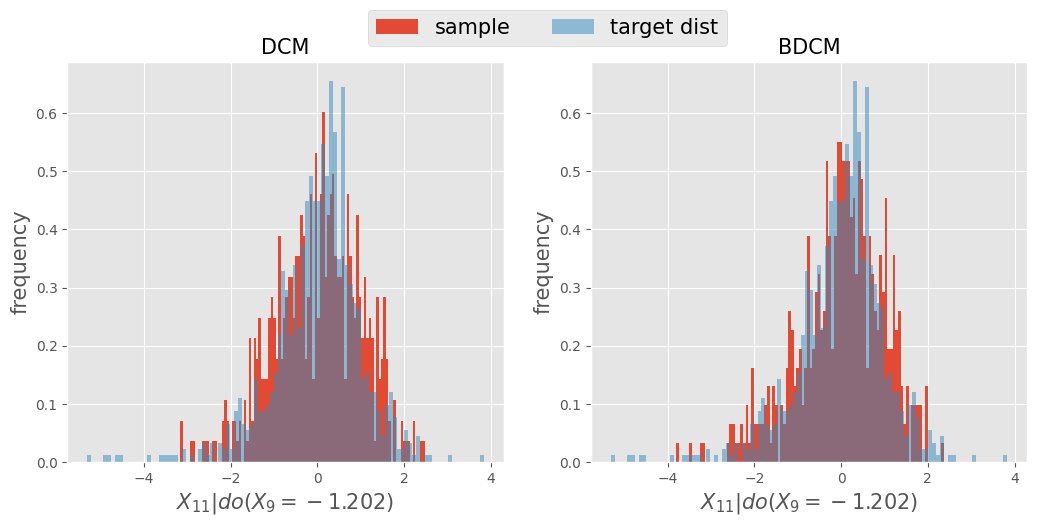

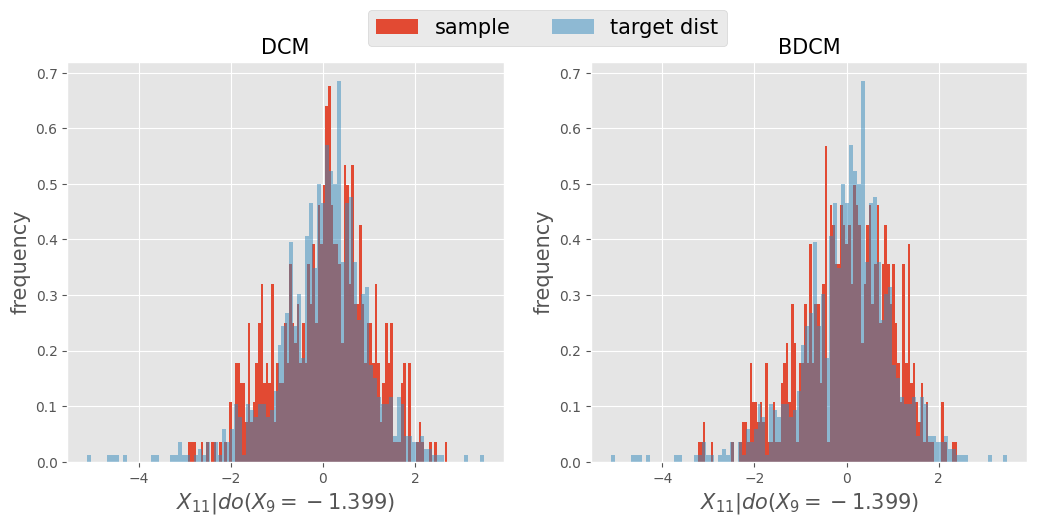

 60%|██████    | 3/5 [24:32<16:18, 489.25s/it]

mean of MMD for DCM: 0.000305
standard deviation of MMD for DCM: 0.000222
mean of MMD for BDCM: 0.000169
standard deviation of MMD for BDCM: 9.67e-05


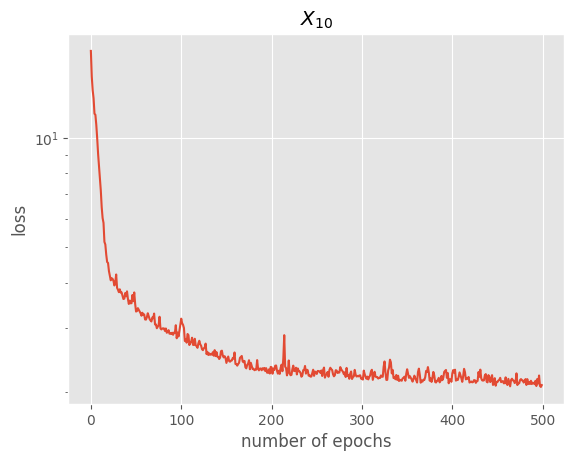

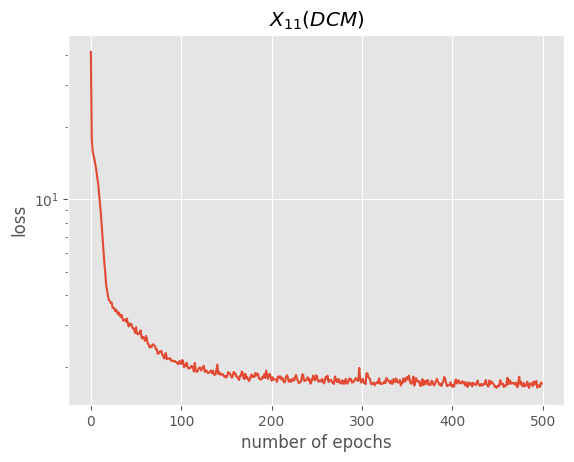

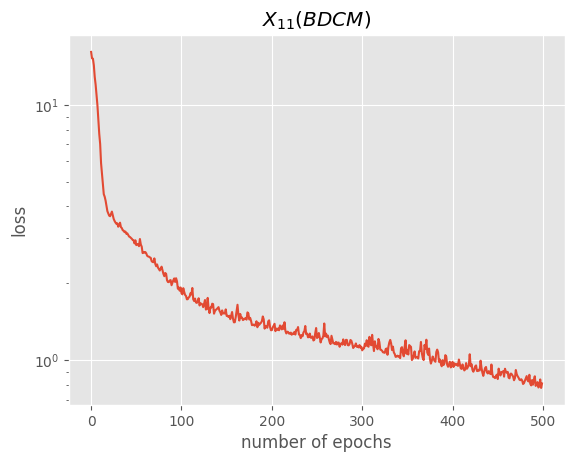

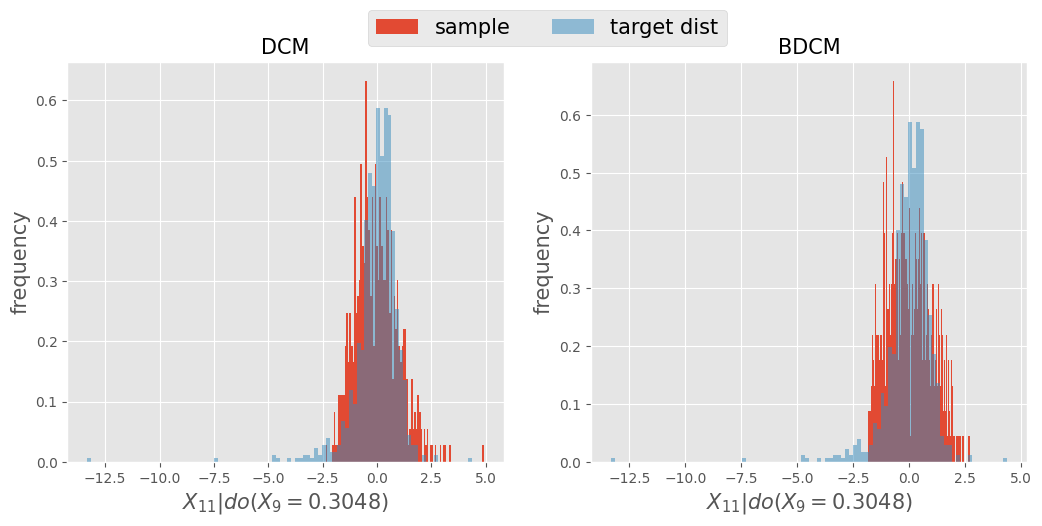

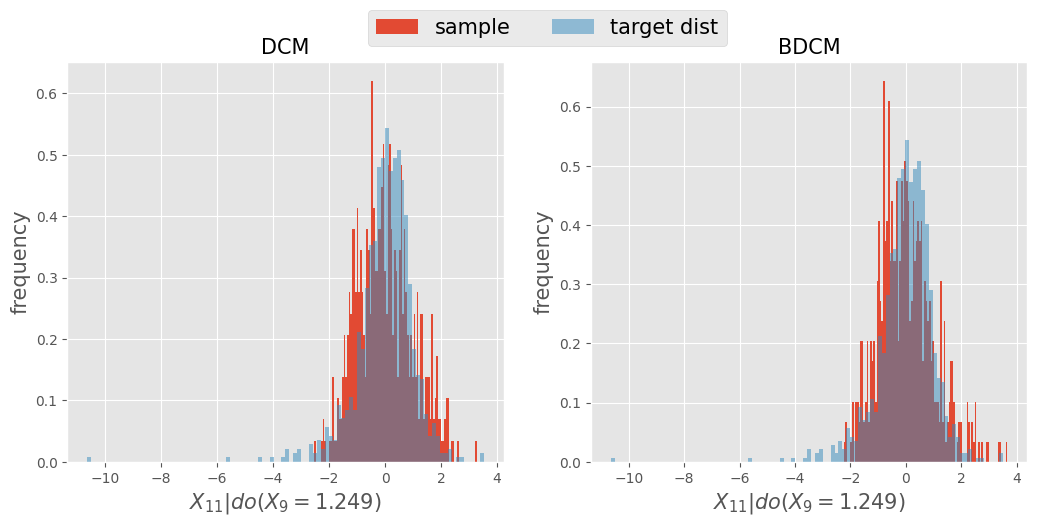

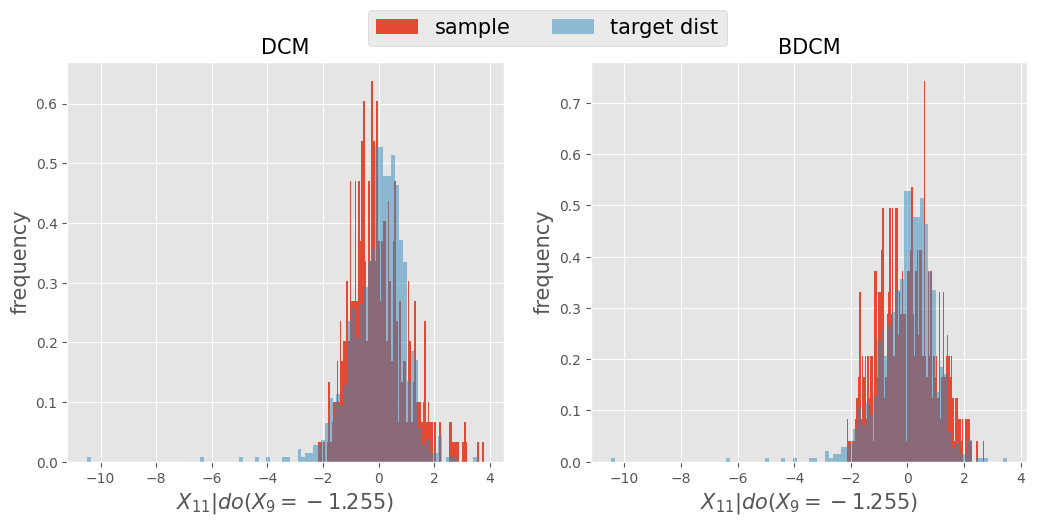

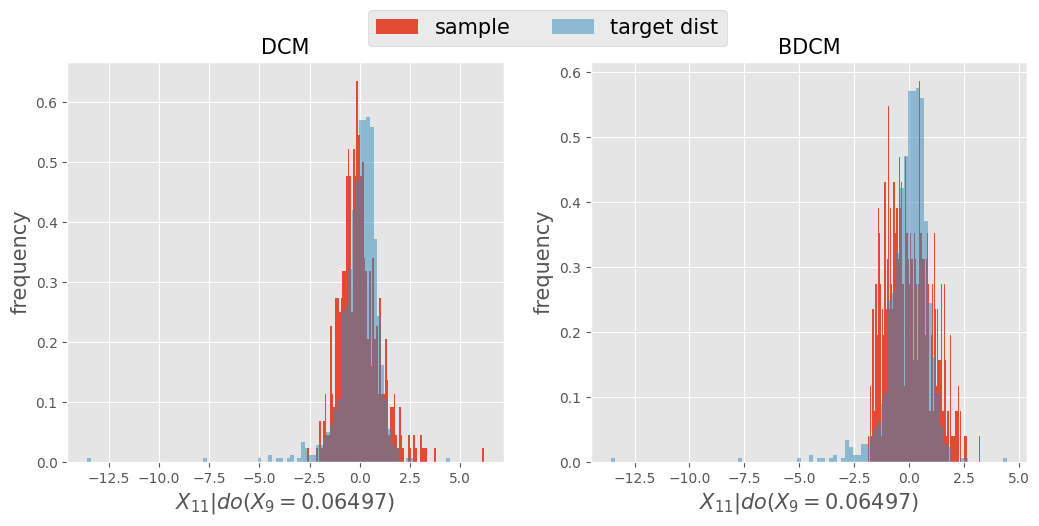

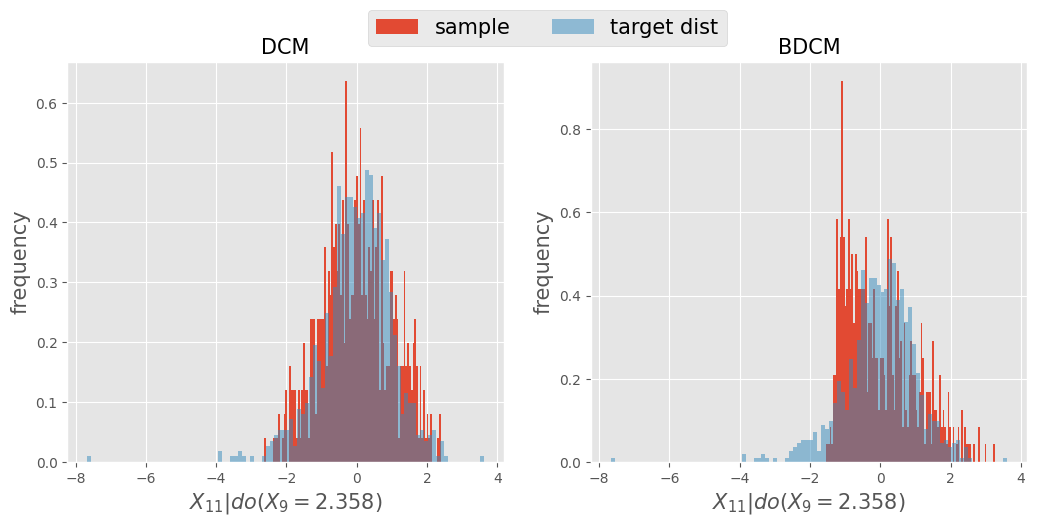

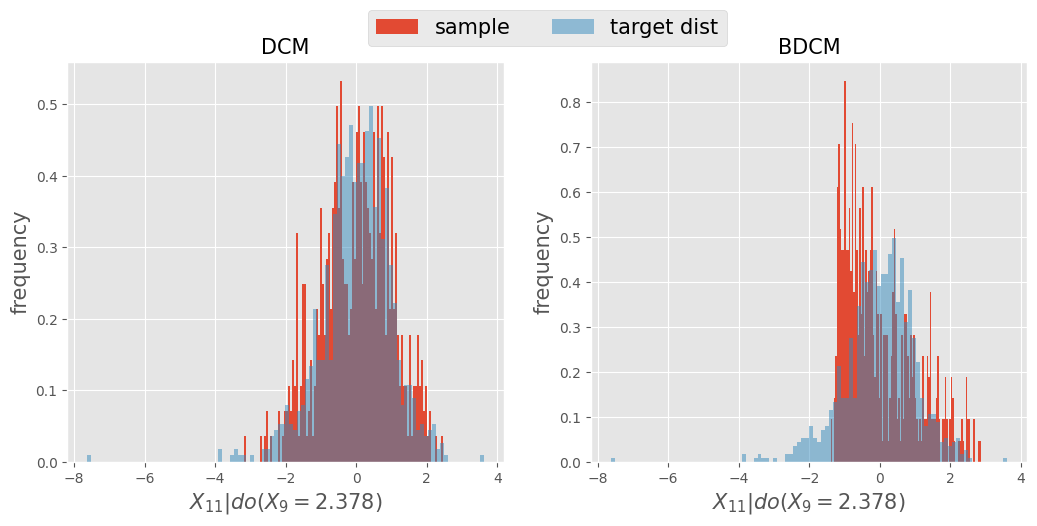

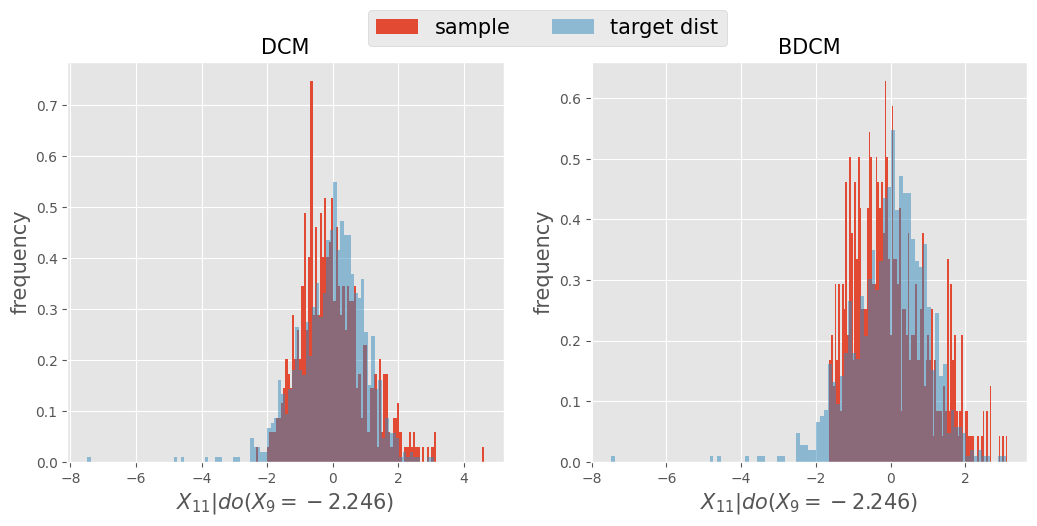

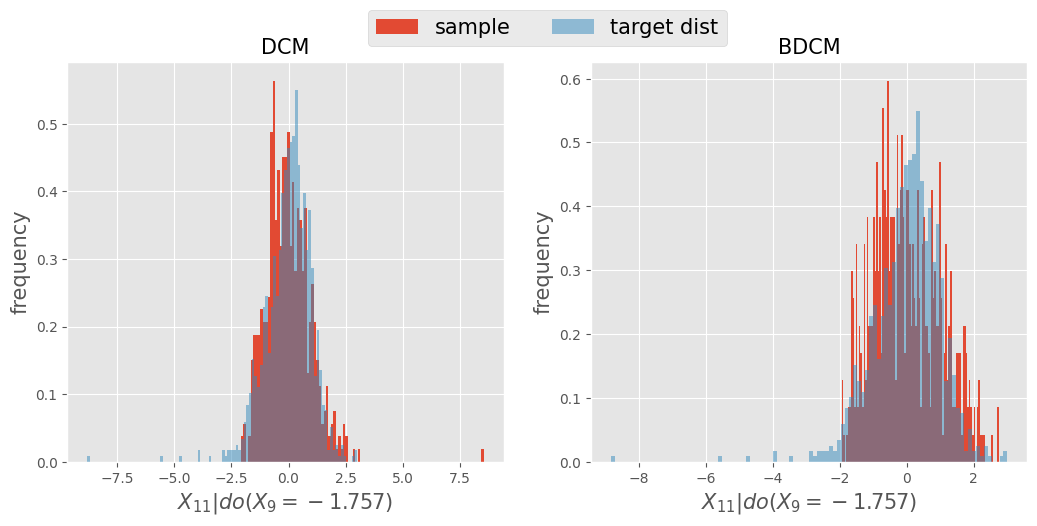

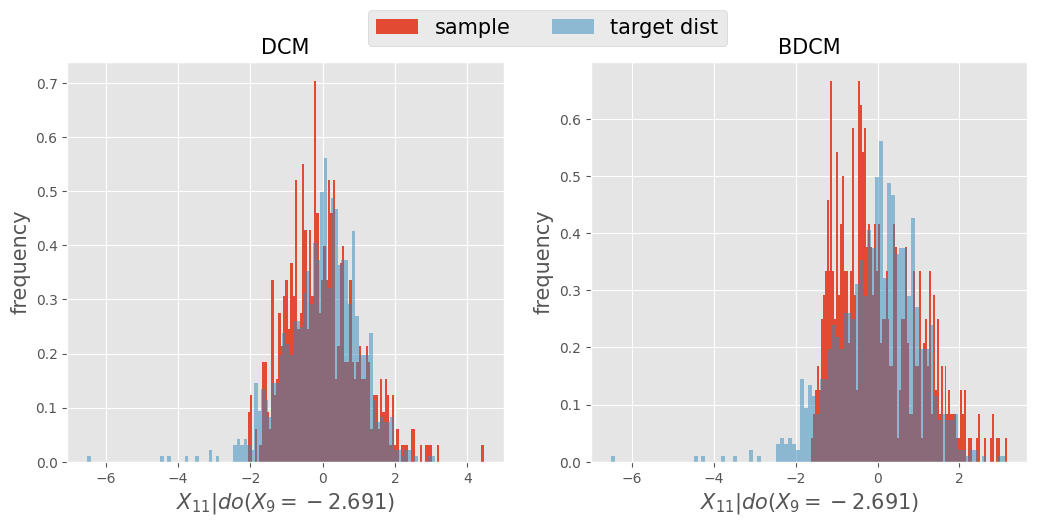

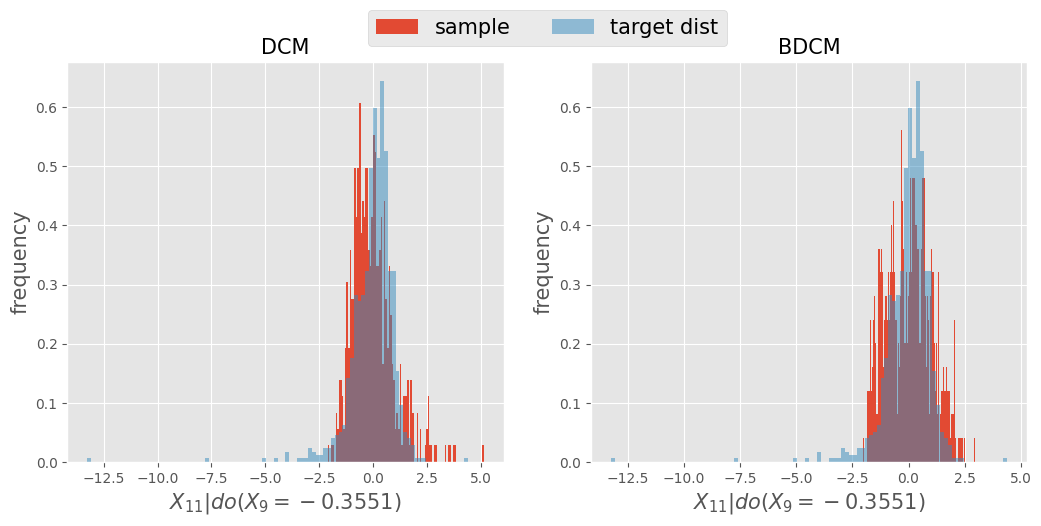

 80%|████████  | 4/5 [32:44<08:10, 490.63s/it]

mean of MMD for DCM: 0.000885
standard deviation of MMD for DCM: 0.000677
mean of MMD for BDCM: 0.000955
standard deviation of MMD for BDCM: 0.000464


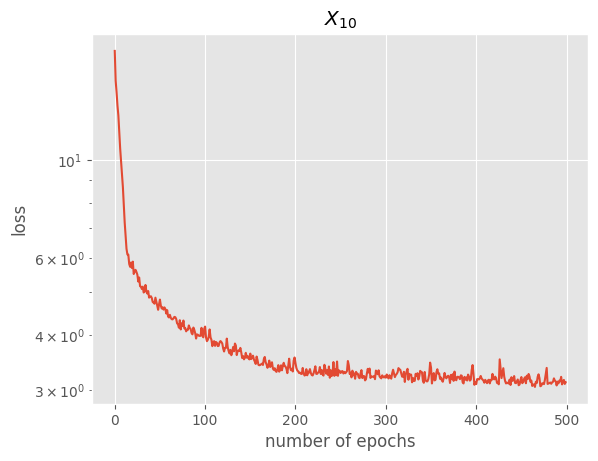

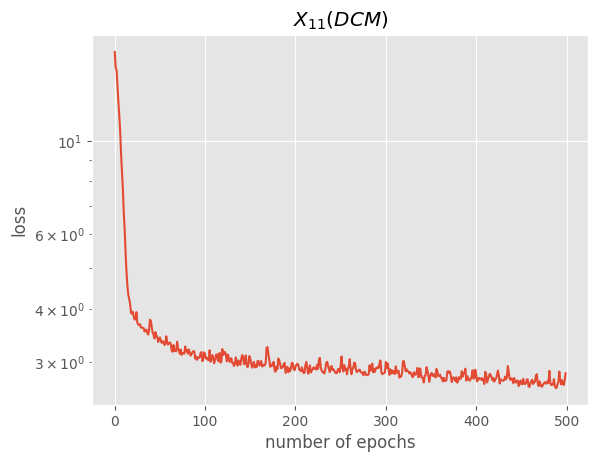

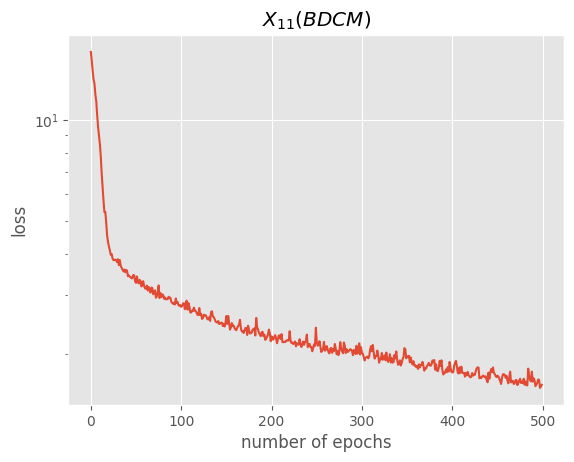

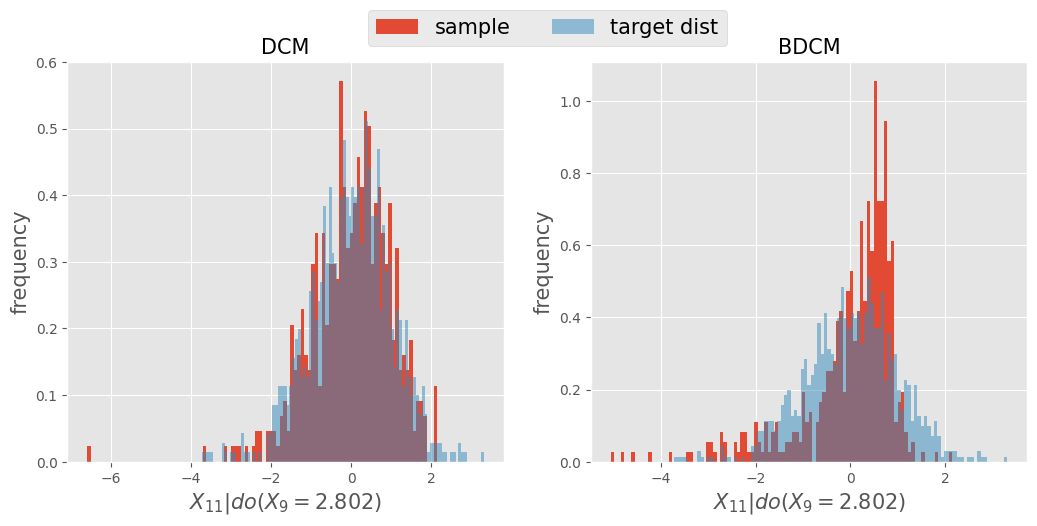

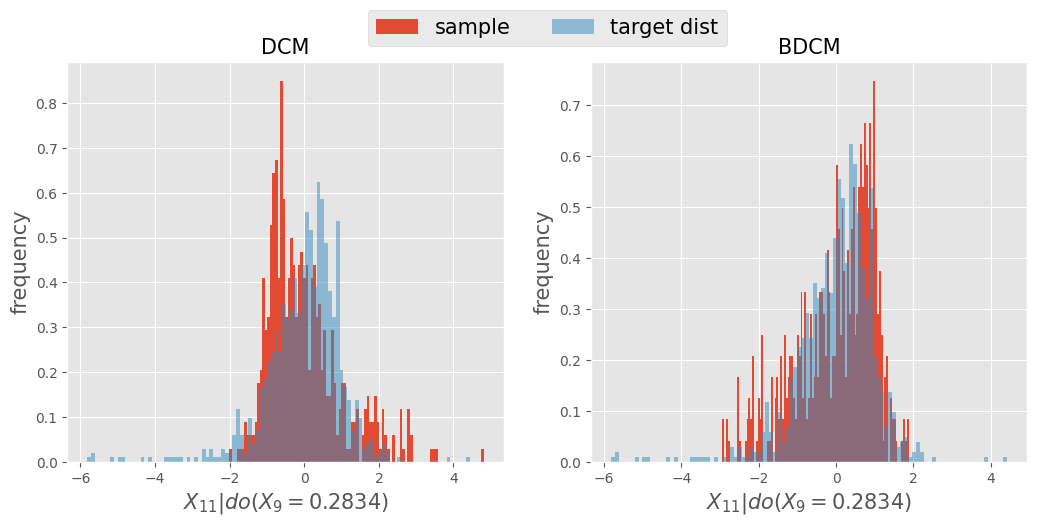

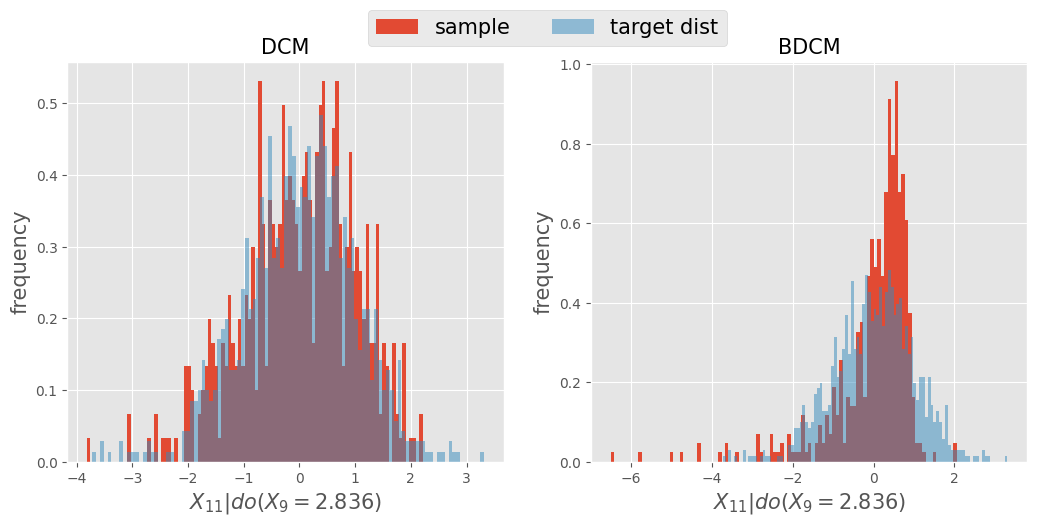

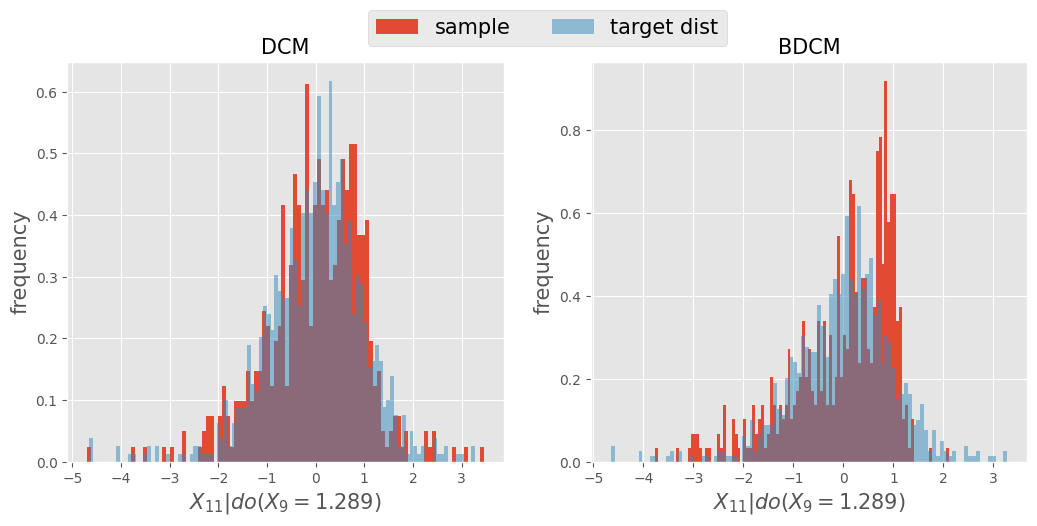

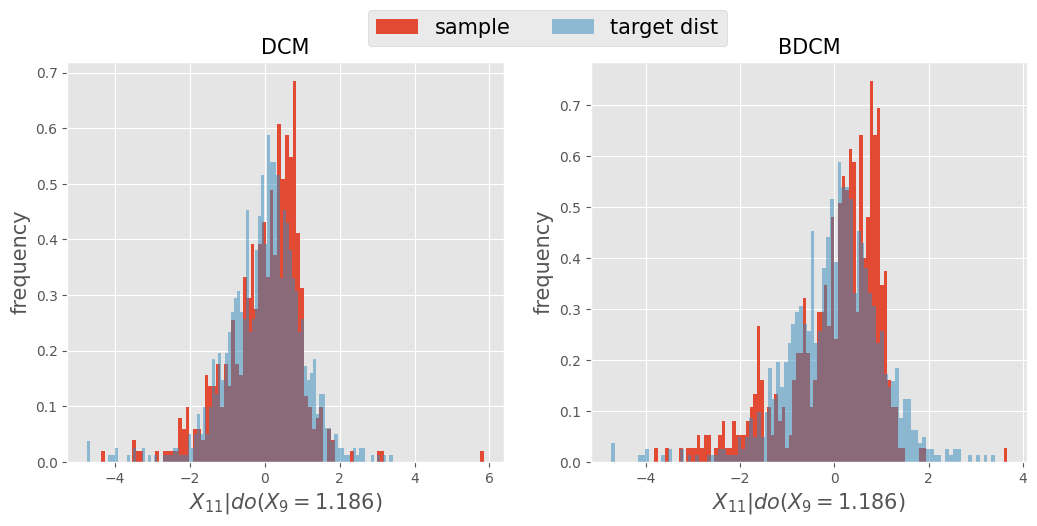

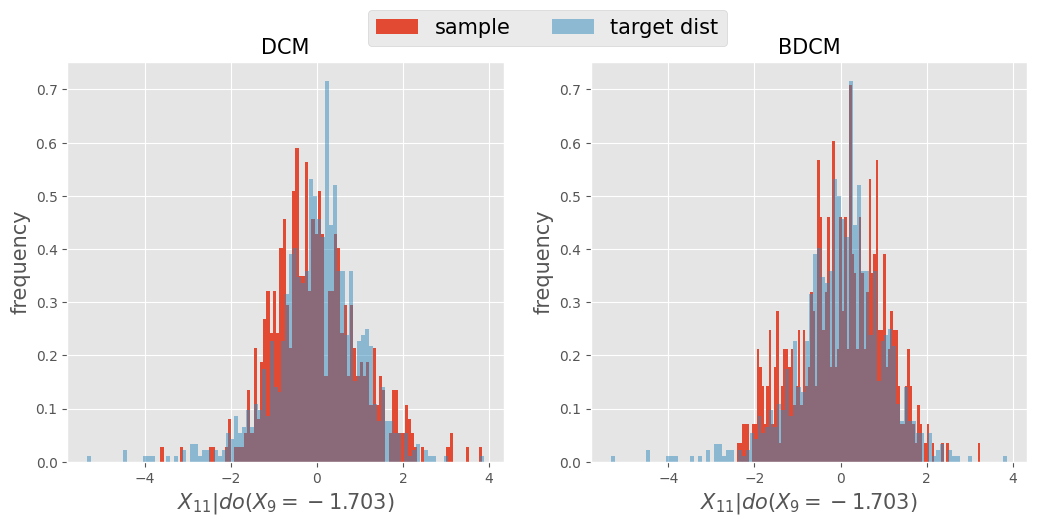

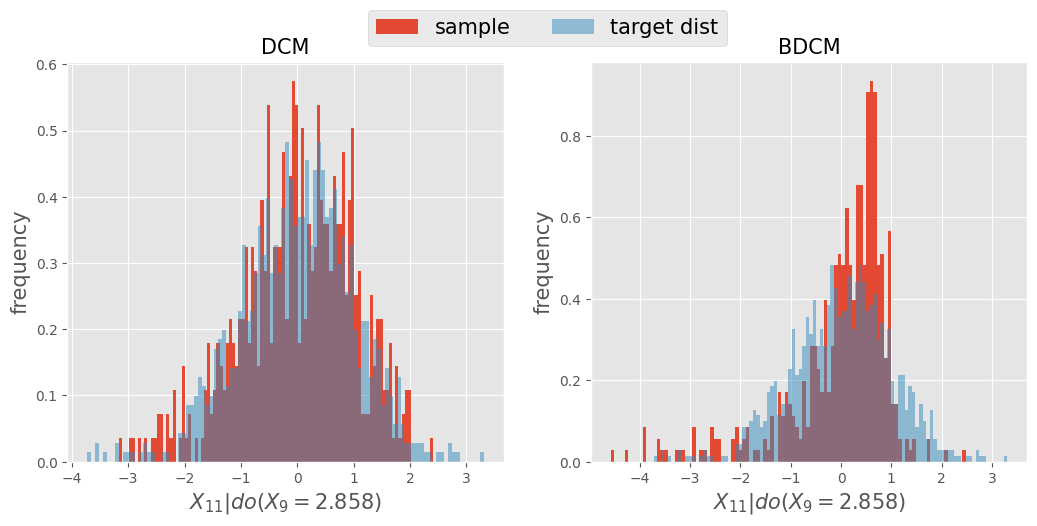

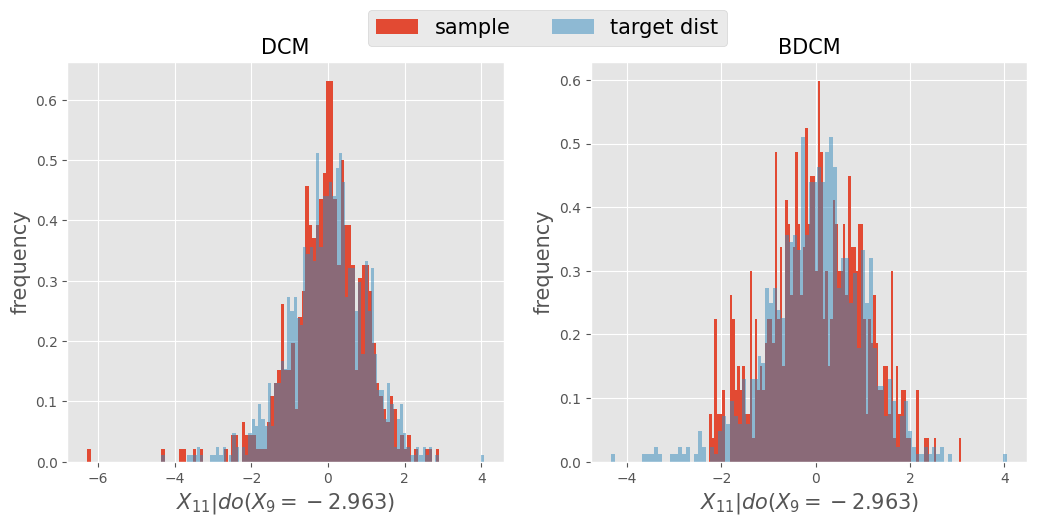

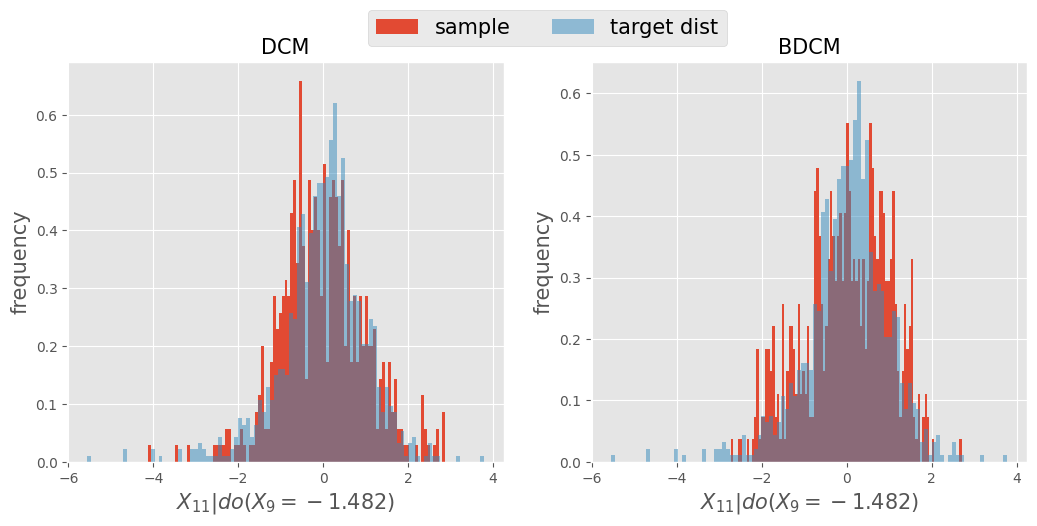

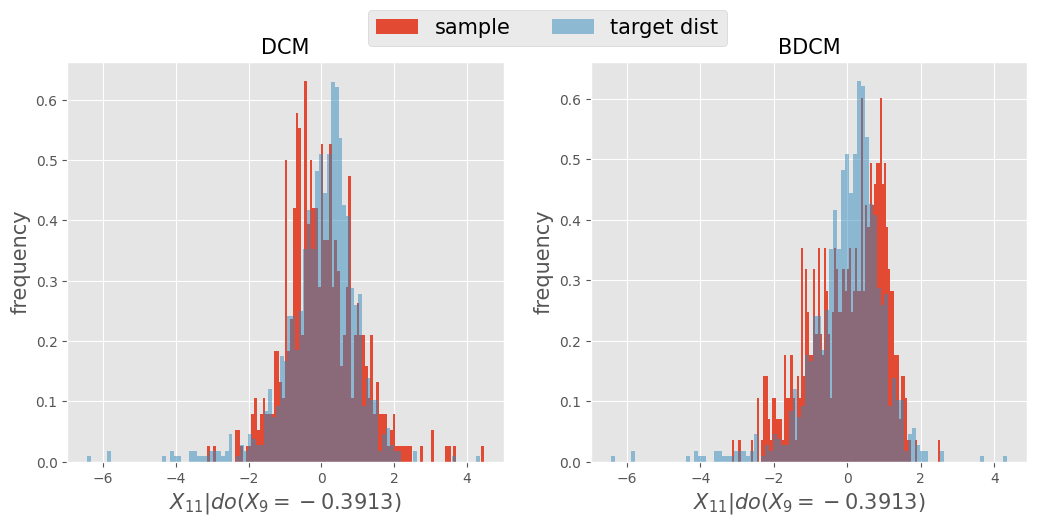

100%|██████████| 5/5 [40:56<00:00, 491.21s/it]

mean of MMD for DCM: 0.000422
standard deviation of MMD for DCM: 0.000249
mean of MMD for BDCM: 0.000818
standard deviation of MMD for BDCM: 0.000766
mean of all MMD for DCM: 0.000747
standard deviation of all MMD for DCM: 0.000575
mean of all MMD for BDCM: 0.000638
standard deviation of all MMD for BDCM: 0.000586


In [3]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = -x[0] + u
  elif ind == 2:
    output = x[1] + 0.1 + u
  elif ind == 3:
    output = -x[1] + 0.1 + u
  elif ind == 4:
    output = 1.3 * x[0] + u + x[0] * u
  elif ind == 5:
    output = - 1.2 * (x[4] + 0.1)  + x[4] + u
  elif ind == 6:
    output = -x[5] ** 2 - x[5] + u
  elif ind == 7:
    output = 3 * x[5] + 0.1 + u
  elif ind == 8:
    output = x[0] * x[4] + (x[0] + 0.1) - x[4] ** 2 + u
  elif ind == 9:
    output = x[8] ** 2 + u
  elif ind == 10:
    output = x[2] * x[3] + x[6] * x[7] - 0.1 + x[8] * x[9] + x[2] * x[8] - x[6] * x[9] + x[7]
  return normalize(output)

SCM5(structural_eq=structural_eq, simple_or_complex = "simple")